## What does this notebook do?
This notebook accesses data from [space-track.org](https://www.space-track.org/) to analyse the Fengyun-1C debris (FY-1C) in orbit using a Gabbard diagram. The data is a part of space-track's [gp](https://www.space-track.org/documentation#api-basicSpaceDataGp) class ( general perturbations ), which is an efficient listing of the newest SGP4 keplerian element set for each artificial earth-orbiting object tracked by the 18th Space Defense Squadron.

## Requirements:
To use this notebook, replace 'username' and 'password' with your existing login credentials. Uncomment and run the required line below to ensure necessary packages are present locally/ in the cloud.

In [1]:
# %pip install matplotlib pandas requests seaborn

In [2]:
import io
import matplotlib.pyplot as plt 
import pandas as pd
import requests
import seaborn as sns

In [3]:
username = None
password = None

if not username or not password:
    print("Enter valid credentials")

siteCred = { 'identity': username, 'password': password }

In [4]:
# Error class to handle 'POST' and 'GET' errors
class HandleError(Exception):
    def __init__(self, args):
        Exception.__init__(self, "Exception raised with args {0}".format(args))
        self.args = args

In [5]:
uriBase = "https://www.space-track.org"
requestLogin = "/ajaxauth/login"
requestQuery = "/basicspacedata/query"

# OBJECT_TYPE = DEBRIS
objectDebris = "/class/gp/OBJECT_TYPE/DEBRIS"

# Filters data by OBJECT_NAME
predicate1 = "/OBJECT_NAME/~~FENGYUN%201C"

# Orders the data by NORAD_CAT_ID
orderBy = "/orderby/NORAD_CAT_ID%20asc"

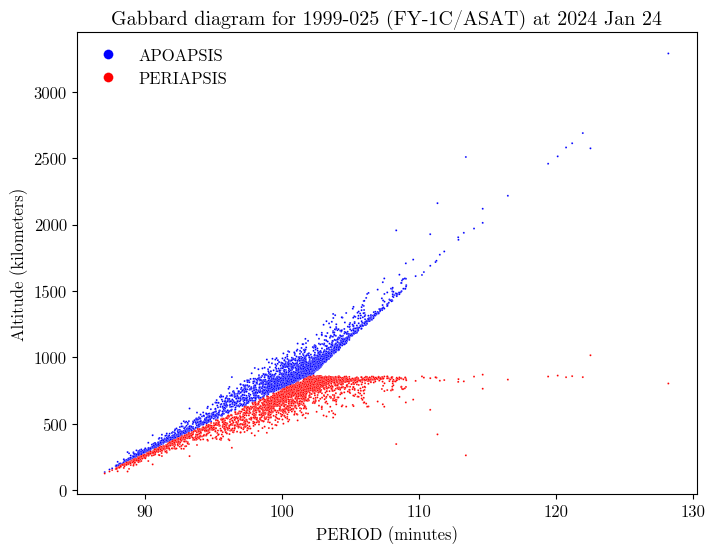

In [6]:
with requests.Session() as session:
    postCheck = session.post(uriBase + requestLogin, data = siteCred)
    if postCheck.status_code != 200:
        raise HandleError('POST')

    # Requests for DEBRIS data where OBJECT_NAME like FENGYUN 1C
    response1 = session.get(uriBase + requestQuery + objectDebris + predicate1 + orderBy)
    if response1.status_code != 200:
        raise HandleError('GET')
    
    data1 = response1.text

    dataFrame1 = pd.read_json(io.StringIO(data1))

    """
    Using any available fonts is permissible for the plots, 
    but I chose CMU Serif for aesthetic reasons.
    For Ubuntu, you can install the font package fonts-cmu 
    (using sudo apt install fonts-cmu), which contains the fonts.
    """
    # plt.rcParams['font.family'] = "CMU Serif"
    # plt.rcParams['font.size'] = 12

    plt.figure(figsize = (8, 6))

    sns.scatterplot(data = dataFrame1.melt(id_vars = 'PERIOD', value_vars = ['APOAPSIS', 'PERIAPSIS'], 
                                           var_name = 'Altitude', value_name = 'Value'), 
                                           x = 'PERIOD', y = 'Value', hue = 'Altitude',
                                           size = 'Altitude', sizes = (2, 2), 
                                           palette = {'APOAPSIS': 'blue', 'PERIAPSIS': 'red'})

    plt.xlabel("PERIOD (minutes)")
    plt.ylabel("Altitude (kilometers)")
    plt.title("Gabbard diagram for 1999-025 (FY-1C/ASAT) at 2024 Jan 24")

    plt.legend(loc = "upper left", markerscale = 5, frameon = False)

    plt.show()

session.close()